# Post EDA Notebook For Aggregating Other Data

In [14]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Notebook Settings
## Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Display Settings
pd.options.display.max_columns = None
pd.options.display.width = None

In [15]:
house_data_df = pd.read_csv('../data/house_data_df.csv')
house_data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,month,year,zip
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.19052,0,5,2022,98055
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.35591,0,12,2021,98133
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,47.502045,-122.22520,0,9,2021,98178
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.29020,0,12,2021,98118
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.07188,0,8,2021,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.32940,0,11,2021,98103
29194,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.38851,0,6,2021,98116
29195,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.29585,0,5,2022,98122
29196,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,47.449490,-122.18908,0,2,2022,98055


In [16]:
# Check Column Value Counts
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29198 entries, 0 to 29197
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29198 non-null  float64
 1   bedrooms       29198 non-null  int64  
 2   bathrooms      29198 non-null  float64
 3   sqft_living    29198 non-null  int64  
 4   sqft_lot       29198 non-null  int64  
 5   floors         29198 non-null  float64
 6   waterfront     29198 non-null  object 
 7   greenbelt      29198 non-null  object 
 8   nuisance       29198 non-null  object 
 9   view           29198 non-null  object 
 10  condition      29198 non-null  object 
 11  grade          29198 non-null  object 
 12  heat_source    29198 non-null  object 
 13  sewer_system   29198 non-null  object 
 14  sqft_above     29198 non-null  int64  
 15  sqft_basement  29198 non-null  int64  
 16  sqft_garage    29198 non-null  int64  
 17  sqft_patio     29198 non-null  int64  
 18  yr_bui

In [17]:
# Check sewer_system values
house_data_df.sewer_system.value_counts()

PUBLIC                24858
PRIVATE                4333
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [18]:
# Drop rows with 'PRIVATE RESTRICTED' & 'PUBLIC RESTRICTED' values
house_data_df = house_data_df.loc[(house_data_df['sewer_system'] == 'PUBLIC') |
                                  (house_data_df['sewer_system'] == 'PRIVATE')]
# Check new df counts
house_data_df.sewer_system.value_counts()

PUBLIC     24858
PRIVATE     4333
Name: sewer_system, dtype: int64

In [19]:
#Inspect heat_source values
house_data_df.heat_source.value_counts()

Gas                  20166
Electricity           5954
Oil                   2897
Gas/Solar               93
Electricity/Solar       57
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

<AxesSubplot: ylabel='Density'>

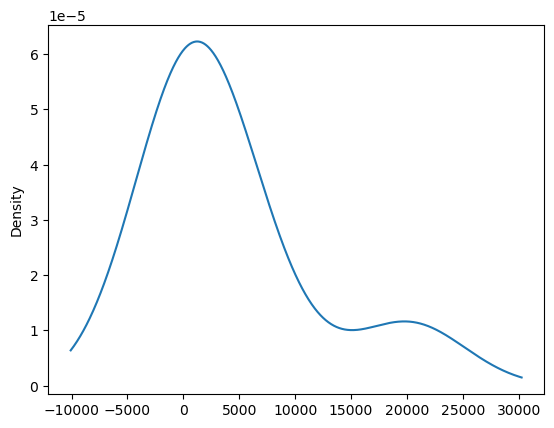

In [20]:
# Density plot of heat source values
heating_type_counts = house_data_df.heat_source.value_counts()
heating_type_counts.plot.density()

In [21]:
# Extract values with counts less than 2000 for binning
replace_heating_type = list(heating_type_counts[heating_type_counts < 2000].index)

# Replace in dataframe
for heating_type in replace_heating_type:
    house_data_df.heat_source = house_data_df.heat_source.replace(heating_type,"Solar_Other")
    
# Check to make sure binning was successful
house_data_df.heat_source.value_counts()

/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_38362/314156582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df.heat_source = house_data_df.heat_source.replace(heating_type,"Solar_Other")


Gas            20166
Electricity     5954
Oil             2897
Solar_Other      174
Name: heat_source, dtype: int64

In [22]:
# Check data types
house_data_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
lat              float64
long             float64
renovated          int64
month              int64
year               int64
zip                int64
dtype: object

In [23]:
# Handle Ordinal Data
## Convert yes/no columns to numeric binary
house_data_df['waterfront'] = house_data_df['waterfront'].map({'YES': 1, 'NO': 0})
house_data_df['greenbelt'] = house_data_df['greenbelt'].map({'YES': 1, 'NO': 0})
house_data_df['nuisance'] = house_data_df['nuisance'].map({'YES': 1, 'NO': 0})

## Convert ordinal conlumns to numeric rank
house_data_df['view'] = house_data_df['view'].map({'NONE': 0, 'FAIR': 1, 'AVERAGE' : 2, 'GOOD' : 3, 'EXCELLENT': 4})
house_data_df['condition'] =  house_data_df['condition'].map({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5})
house_data_df['grade'] = house_data_df['grade'].map({'1 Cabin': 1, '2 Substandard': 2, '3 Poor': 3, '4 Low': 4, '5 Fair': 5,'6 Low Average': 6,'7 Average': 7,'8 Good': 8,'9 Better': 9,'10 Very Good': 10,'11 Excellent': 11,'12 Luxury': 12,'13 Mansion': 13})

/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_38362/3900945064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df['waterfront'] = house_data_df['waterfront'].map({'YES': 1, 'NO': 0})
/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_38362/3900945064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df['greenbelt'] = house_data_df['greenbelt'].map({'YES': 1, 'NO': 0})
/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_38362/3900945064.py:5: SettingWit

In [24]:
# check df to ensure correct categorical encoding
house_data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,month,year,zip
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,4,7,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.19052,0,5,2022,98055
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,2,3,7,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.35591,0,12,2021,98133
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,2,3,7,Gas,PUBLIC,1580,1580,0,0,1956,47.502045,-122.22520,0,9,2021,98178
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,2,3,9,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.29020,0,12,2021,98118
4,592500.0,2,2.0,1120,758,2.0,0,0,1,0,3,7,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.07188,0,8,2021,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193,1555000.0,5,2.0,1910,4000,1.5,0,0,0,0,4,8,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.32940,0,11,2021,98103
29194,1313000.0,3,2.0,2020,5800,2.0,0,0,0,1,3,7,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.38851,0,6,2021,98116
29195,800000.0,3,2.0,1620,3600,1.0,0,0,1,0,3,7,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.29585,0,5,2022,98122
29196,775000.0,3,2.5,2570,2889,2.0,0,0,0,0,3,8,Gas,PUBLIC,1830,740,480,100,2006,47.449490,-122.18908,0,2,2022,98055


In [ ]:
# Add log price column here
house_data_df['log_price'] = np.log1p(house_data_df['price'])

# education metric calculation

In [ ]:
# Calculate and append education score for each zipcode
## Read in education data from Washington state data portal
school_data_df = pd.read_csv('../data/Report_Card_Assessment_Data_2021-22_School_Year (3).csv')
school_data_df

In [ ]:
# Filter data by selecting all students per school segment
school_all_students_df = df.loc[df['StudentGroupType'] == 'All']
school_all_students_df

In [ ]:
# Groupby school district and aggregate count of tests taken
district_tests_taken = school_all_students_df.groupby(by=['DistrictCode','DistrictName'])\
['Count of students expected to test including previously passed'].sum().reset_index(name='test_taken')

In [ ]:
# Groupby school district and aggregate count of students who met state education standards
district_met_standard = school_all_students_df.groupby(by='DistrictCode')['CountMetStandard']\
.sum().reset_index(name='met_standard')

In [ ]:
# Merge the two groupbys to have a single df with counts of tests taken and students who met standard
merged_district_df = pd.merge(district_tests_taken, district_met_standard, on='DistrictCode')

In [ ]:
# Calculate the percent of students who met state education standards
merged_district_df['percent_met_standard'] = (merged_district_df['met_standard'] / 
                                              merged_district_df['test_taken'])

In [ ]:
# Drop count columns
district_ed_standard = merged_district_df.drop(columns=['met_standard','test_taken'])

In [ ]:
# Rename DistrictName column for future join and drop
district_ed_standard['district'] = district_ed_standard['DistrictName']
district_ed_standard.drop(columns='DistrictName', axis=1, inplace=True)

In [ ]:
# Remove 'Scool District' from district names
district_ed_standard['district'] = district_ed_standard['district'].str.slice(stop=-16)
# Fix Seattle district name
district_ed_standard['district'][0] = 'Seattle'
# Convert district names to all upppercase
district_ed_standard['district'] = district_ed_standard['district'].str.upper()
district_ed_standard

In [ ]:
# Read in school location data retrieved from country data portal
school_sites_df = pd.read_csv('../data/School_Sites_in_King_County___schsite_point.csv')
school_sites_df

In [ ]:
# Merge school standard and location df
district_ed_standard = school_sites_df.merge(
    district_ed_standard, left_on='DISTRICT', right_on='district', 
    suffixes=(False, False))
distict_ed_standard

In [ ]:
# Create new df to hold zip codes and corresponding eduction standard rates 
zip_ed_standard_df = district_ed_standard[['percent_met_standard']]
zip_ed_standard_df['zip'] = distict_ed_standard['ZIPCODE']
zip_ed_standard_df

In [ ]:
# Drop duplicate zip codes 
zip_ed_standard_df.drop_duplicates(subset='zip', inplace=True)

# Add commuting distances here

In [25]:
# Export df for baseline model
house_data_df.to_csv('../data/baseline_df.csv', index=False)